## Heart Disease Prediction Model

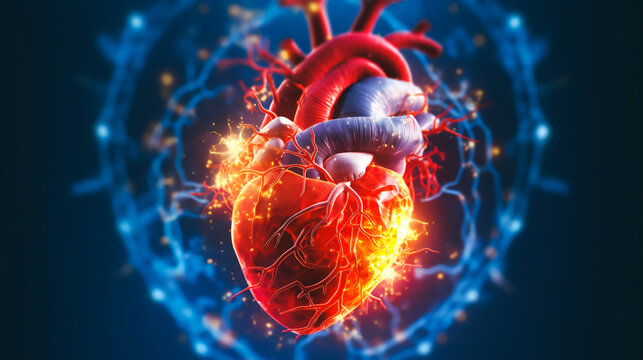

In [1]:
from IPython.display import Image
Image(filename='/Users/adityaanandraogaikwad/Desktop/Ml Updated /Heart Diseases/Heart.jpg',width=1100,height=400)

In [2]:
# Importing the essential Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Models to test
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')  

In [3]:
# Loading data set 

try:
    df = pd.read_csv('/Users/adityaanandraogaikwad/Desktop/DATA SETS/heart-disease.csv')
    print('Loaded data sucessfully')
except:
    print('Error in loading data')

Loaded data sucessfully


In [4]:
df.sample(frac=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
236,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- From above data we can see the insights 

1. We have total 14 columns and 303 data points 
2. All data is in numerical form i.e (int,float) so there is no need for encoding
3. There are no missing values in the data 

In [6]:
# Descrptive Statistics or Univariate Analysis

import pandas as pd
from collections import OrderedDict

stats = []

for i in df.columns:
    numerical_stats = OrderedDict({
        'Count' : df[i].count(),
        'Mean' : df[i].mean(),
        'Median(50%)' : df[i].median(),
        'Std' : df[i].std(),
        'Skewness' : df[i].skew(),
        'Kurtosis' : df[i].kurt(),
        'Min' : df[i].min(),
        '25%' : df[i].quantile(0.25), 
        '75%' : df[i].quantile(0.75), 
        'Max' : df[i].max(),
        'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25) 
    })
    stats.append(pd.Series(numerical_stats, name=i))

report = pd.DataFrame(stats).T  # Transpose so features are columns
report

# Here we have created custom dictionary using orderdict and loop and then converted into dataframe for better visualization.
# Here we can see the descriptive statistics insights of dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
Mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
Median(50%),55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
Std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
Skewness,-0.202463,-0.791335,0.484732,0.713768,1.143401,1.986652,0.162522,-0.537410,0.742532,1.269720,-0.508316,1.310422,-0.476722,-0.179821
Kurtosis,-0.542167,-1.382961,-1.193071,0.929054,4.505423,1.959678,-1.362673,-0.061970,-1.458317,1.575813,-0.627521,0.839253,0.297915,-1.980783
Min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
Max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


From above statistics we can see the insights

1. The is not normally distributed
2. The data has ouliers in columns like chol, thalach
3. Also there is skewness in data 

#### Representation of Data Distribution 

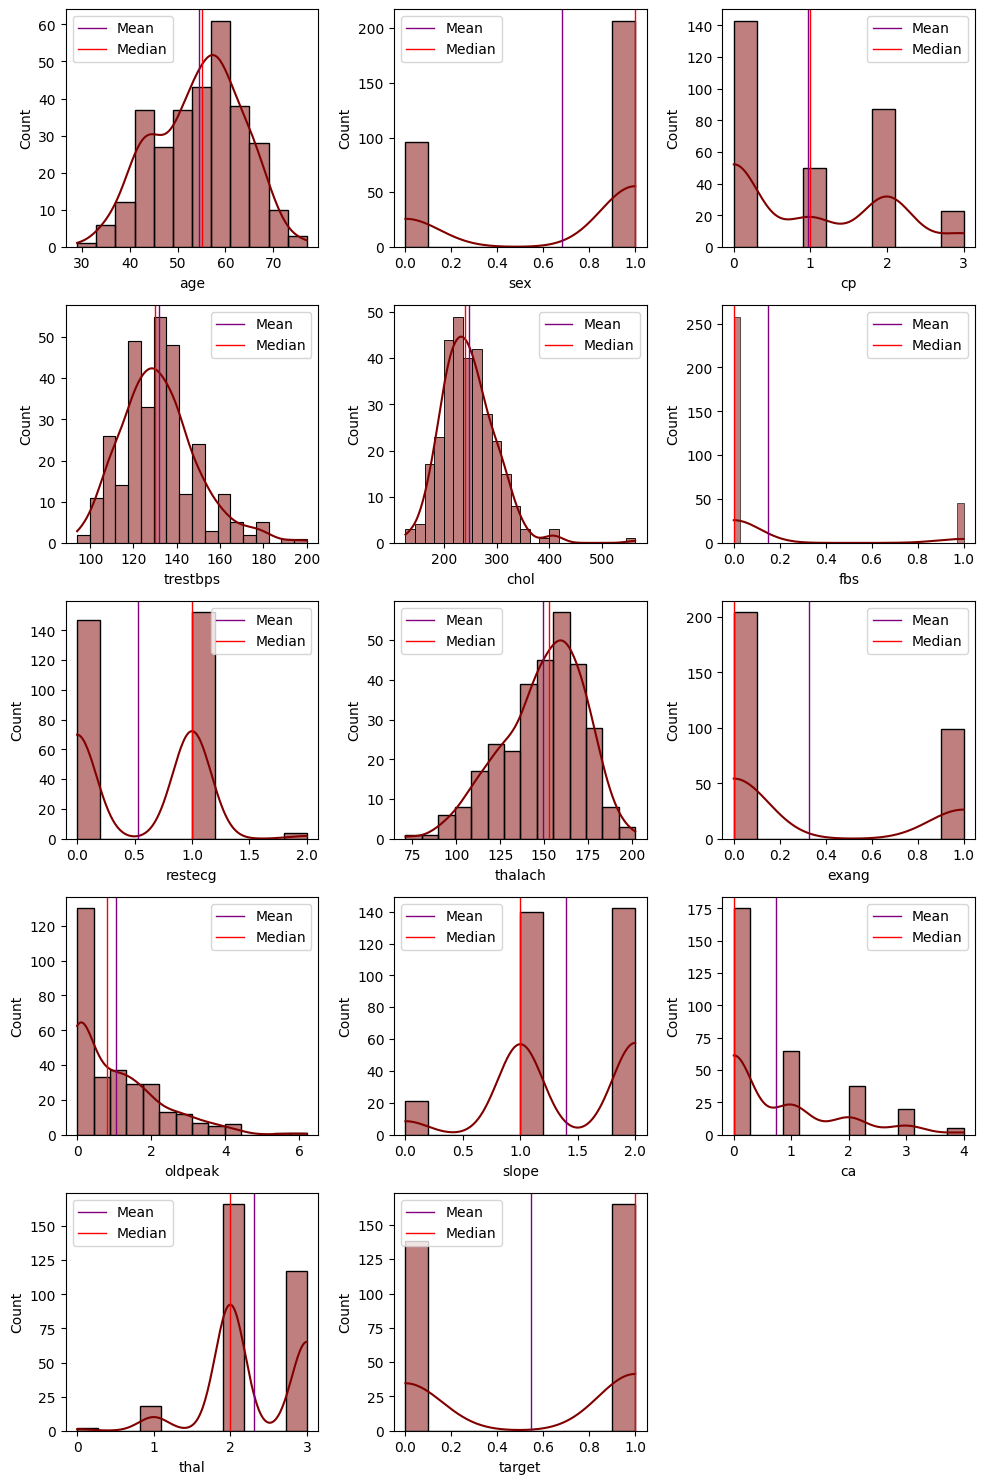

In [7]:
import math

num_cols = len(df.columns)  # Count the number of columns
rows = math.ceil(num_cols / 3)  # Dynamically determine the number of rows

plt.figure(figsize=(10, rows * 3))  # Adjust figure size dynamically
plot = 0

for i in df.columns:
    plot += 1
    plt.subplot(rows, 3, plot)  # Adjust rows dynamically
    sns.histplot(df[i], kde=True, color='maroon')  
    
    plt.axvline(df[i].mean(), color='Purple', linewidth=1, label='Mean')  
    plt.axvline(df[i].median(), color='red', linewidth=1, label='Median')  
    
    plt.legend()

plt.tight_layout()
plt.show()

# Here we are going to see the visual representation of data distribution

#### Determine the outliers using IQR method

In [8]:
import pandas as pd

def find_outliers_iqr(df):
    outlier_dict = {}
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Find outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_dict[col] = outliers
    return outlier_dict

# Usage example:
# Assuming your DataFrame is named df
outliers_by_column = find_outliers_iqr(df)

# Print number of outliers per column
for col, outliers in outliers_by_column.items():
    print(f"{col}: {len(outliers)} outliers")


age: 0 outliers
sex: 0 outliers
cp: 0 outliers
trestbps: 9 outliers
chol: 5 outliers
fbs: 45 outliers
restecg: 0 outliers
thalach: 1 outliers
exang: 0 outliers
oldpeak: 5 outliers
slope: 0 outliers
ca: 25 outliers
thal: 2 outliers
target: 0 outliers


- Note : Gets the outliers count for all columns in the data using IQR method. But IQR method is only can use for continues values, It is not applicable for the binary classification values or multiclass class values.

- So as outlier we can consider only those column having contineus values i.e (trestbps,chol,thalach,oldpeak)



#### Visual Representation of outliers using boxplot

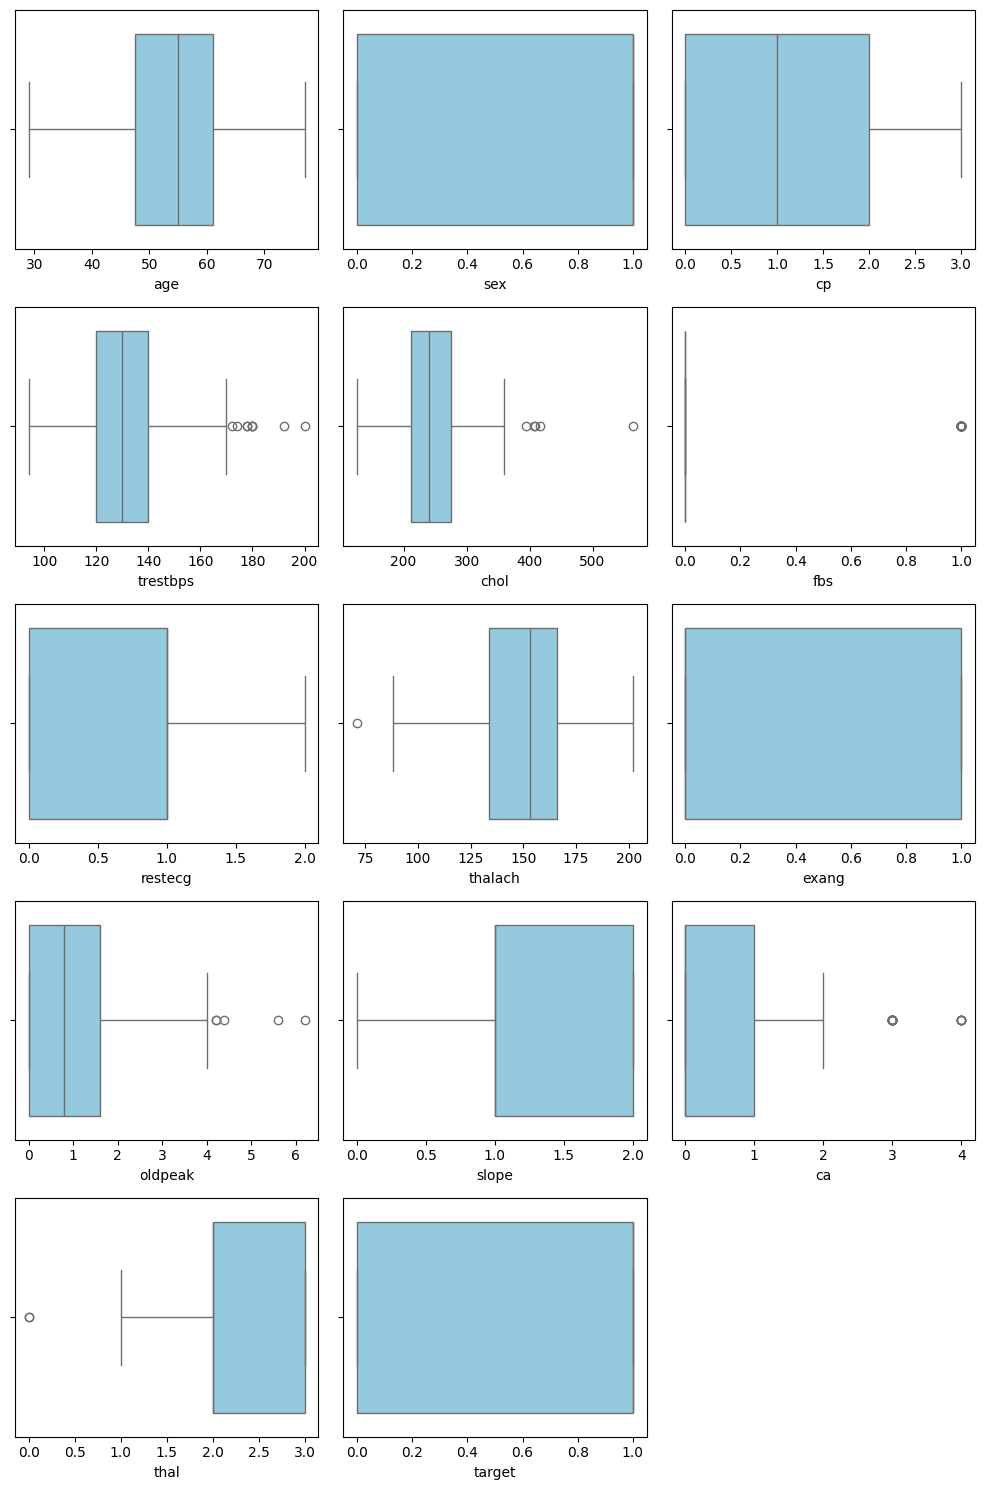

In [9]:
num_cols = len(df.columns)  # Count the number of columns
rows = math.ceil(num_cols / 3)  # Dynamically determine the number of rows

plt.figure(figsize=(10, rows * 3))  # Adjust figure size dynamically
plot = 0

for i in df.columns:
    plot += 1
    plt.subplot(rows, 3, plot)  # Adjust rows dynamically
    sns.boxplot(df[i], color='skyblue',orient='h')  
    
plt.tight_layout()
plt.show()

#### Treating Skewness

| Skewness Range         | Interpretation       |
| ---------------------- | -------------------- |
| -0.5 to +0.5           | Approximately Normal |
| -1 to -0.5 or 0.5 to 1 | Moderately Skewed    |
| < -1 or > +1           | Highly Skewed        |



Need to treat skewness on these three columns

1. chol – cholesterol

2. oldpeak – ST depression

3. ca – number of major vessels

In [10]:
# Checking the contain any negative values 
negative_check = (df < 0).any()
print("Columns with negative values:")
print(negative_check[negative_check == True])


Columns with negative values:
Series([], dtype: bool)


In [11]:
# Checking zero contains columns 
zero_check = (df == 0).any()
print("Columns with zero values:")
print(zero_check[zero_check == True])


Columns with zero values:
sex        True
cp         True
fbs        True
restecg    True
exang      True
oldpeak    True
slope      True
ca         True
thal       True
target     True
dtype: bool


So we have different way to treat skewness 

 1. Log Transform: np.log1p(x)
 - Use when feature is right-skewed and contains only non-negative values (including zeros)
 - Common for financial data, counts, cholesterol, etc.

 2. Box-Cox Transform: scipy.stats.boxcox
 - Use only when feature values are strictly positive (> 0)
 - Ideal for normalizing positive skewed continuous features
 - Not suitable if data contains zeros or negatives

 3. Yeo-Johnson Transform: PowerTransformer(method='yeo-johnson')
 - Use when data includes zeros or negative values
 - General-purpose transform to make data more Gaussian-like
 - Works on any real-valued input

 4. Quantile Transformer: sklearn.preprocessing.QuantileTransformer
 - Use when you want to map any feature to a normal or uniform distribution
 - Works for all value ranges (including 0 and negatives)
 - Best for models that assume normality (e.g., linear models, PCA)
 - May distort relationships for small discrete features


In [12]:
df['chol'] = np.log1p(df['chol'])
df['oldpeak'] = np.log1p(df['oldpeak'])
df['ca'] = np.log1p(df['ca'])  # optional

# Here we have used log1p beacause we have zero values and it is sufficient to handle zero values

In [13]:
# Checking skewness after treating the values
print(df[['chol', 'oldpeak', 'ca']].skew())

chol       0.090242
oldpeak    0.396825
ca         0.757752
dtype: float64


#### Target Column Distribution

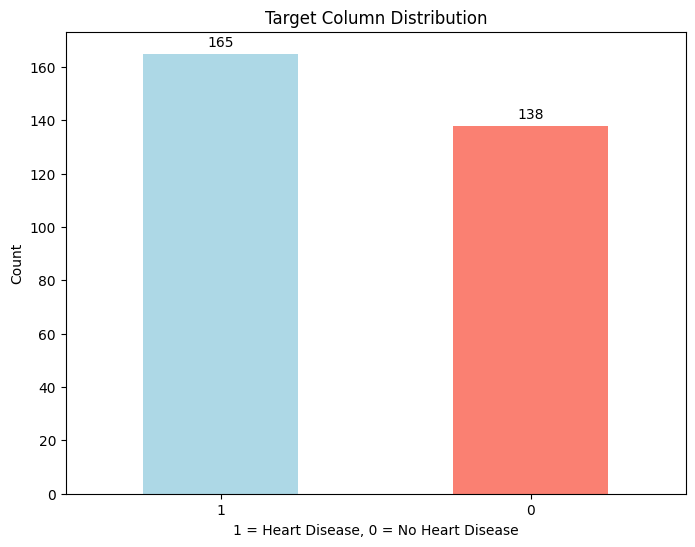

In [14]:
# Plotting the distribution of target column with count annotations
import matplotlib.pyplot as plt

# Plot bar chart
ax = df.target.value_counts().plot(kind='bar',figsize=(8,6), color=['lightblue', 'salmon'])

# Add title and labels
plt.title('Target Column Distribution')
plt.xlabel('1 = Heart Disease, 0 = No Heart Disease')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add count annotations on top of bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset from top of bar
                    textcoords='offset points',
                    ha='center', va='bottom')

plt.show()


#### Multivariate Age Correlation with Cardiovascular Risk Factors

<Axes: xlabel='age', ylabel='thal'>

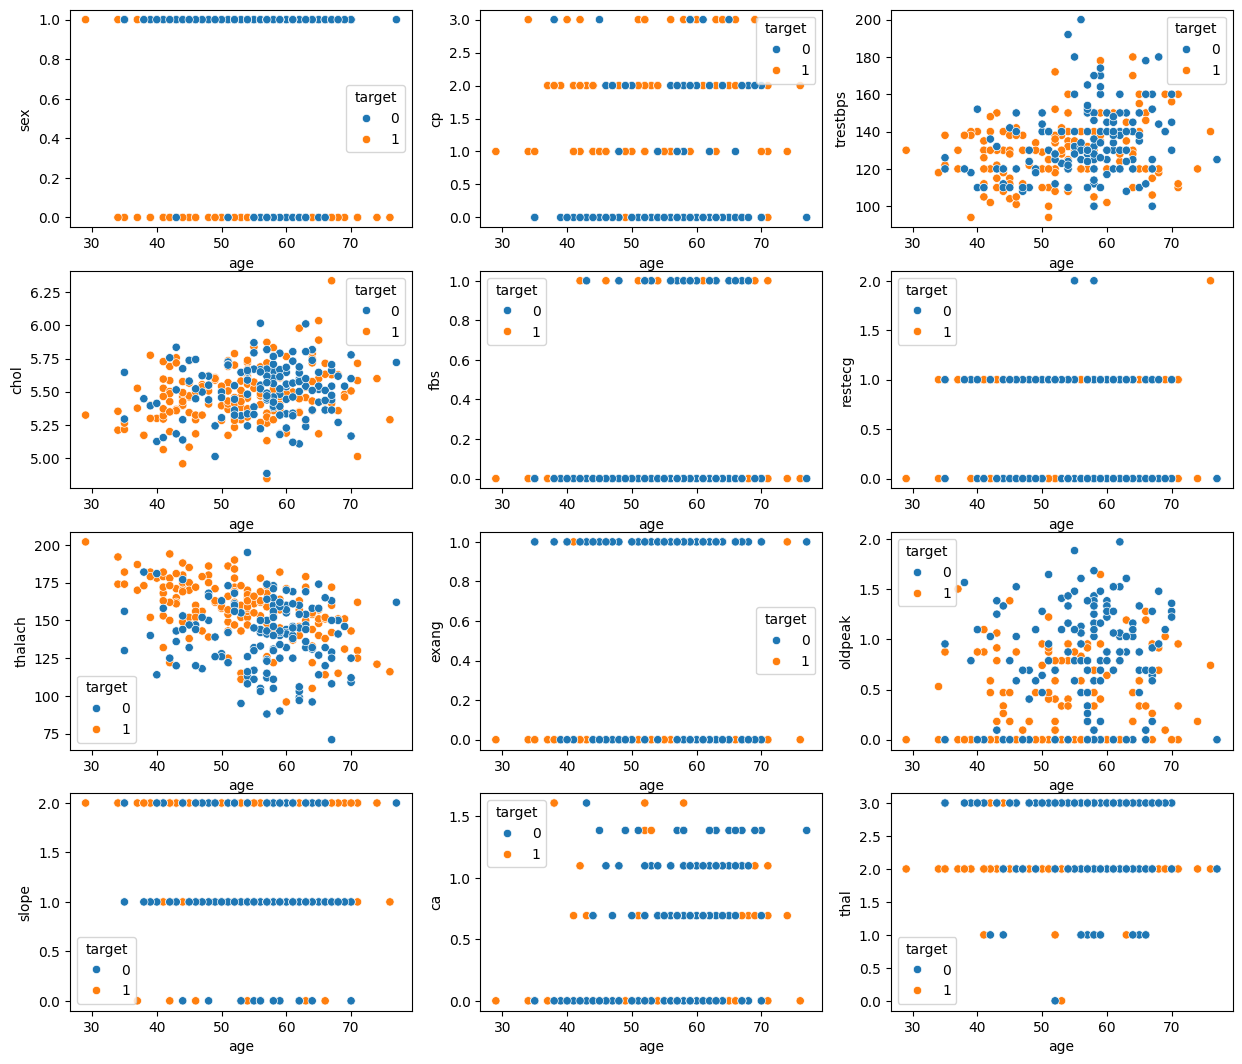

In [15]:
# Plotting the data using scatterplot
fig,ax = plt.subplots(4,3, figsize = (15,13),facecolor = 'white')
sns.scatterplot(ax = ax[0][0], x = df.age, y = df.sex, hue = df.target)
sns.scatterplot(ax = ax[0][1], x = df.age, y = df.cp, hue = df.target)
sns.scatterplot(ax = ax[0][2], x = df.age, y = df.trestbps, hue = df.target)
sns.scatterplot(ax = ax[1][0], x = df.age, y = df.chol, hue = df.target)
sns.scatterplot(ax = ax[1][1], x = df.age, y = df.fbs, hue = df.target)
sns.scatterplot(ax = ax[1][2], x = df.age, y = df.restecg, hue = df.target)
sns.scatterplot(ax = ax[2][0], x = df.age, y = df.thalach, hue = df.target)
sns.scatterplot(ax = ax[2][1], x = df.age, y = df.exang, hue = df.target)
sns.scatterplot(ax = ax[2][2], x = df.age, y = df.oldpeak, hue = df.target)
sns.scatterplot(ax = ax[3][0], x = df.age, y = df.slope, hue = df.target)
sns.scatterplot(ax = ax[3][1], x = df.age, y = df.ca, hue = df.target)
sns.scatterplot(ax = ax[3][2], x = df.age, y = df.thal, hue = df.target)

#### Compare Patient Gender with target Column

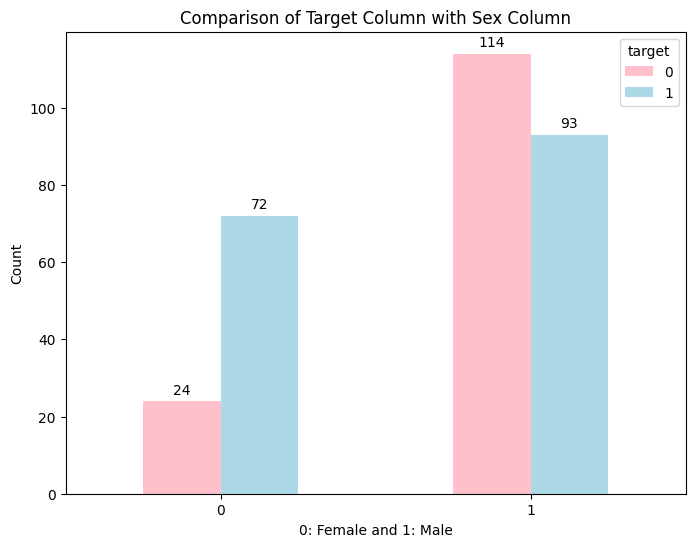

In [16]:
# Create crosstab
crosstab = pd.crosstab(df.sex, df.target)

# Plot and capture the Axes object
ax = crosstab.plot(kind='bar',figsize=(8,6) ,color=['pink', 'lightblue'])
plt.title('Comparison of Target Column with Sex Column')
plt.xlabel('0: Female and 1: Male')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Annotate the bars with counts
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')

plt.show()


- From above visuals we can see that the most of male patients are suffer from heart disease i.e 93
and there are 72 Feamale were suffers from hear disease out of 303 patient
- There are 114 male having no heart disease and on other hand there are 24 Female has no hear disease out of 303 patients.

#### Compare chest pain with target Column

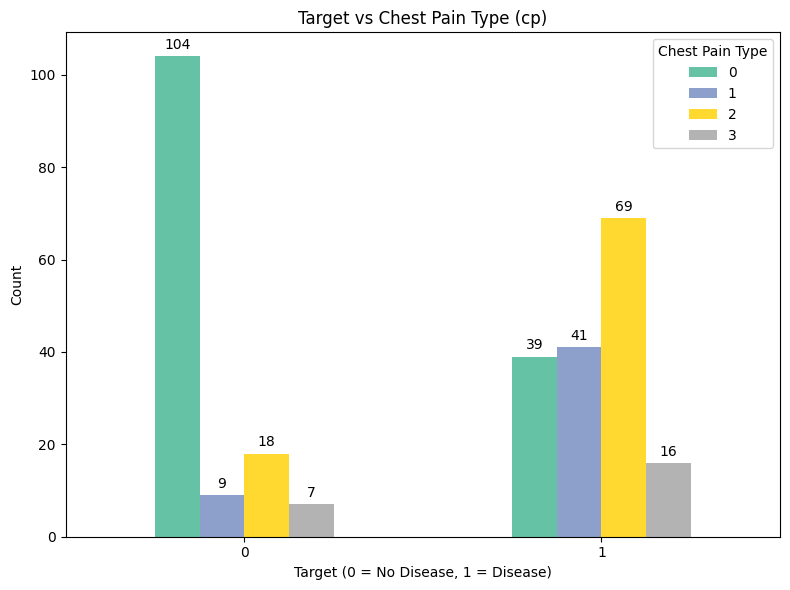

In [17]:
# Chest pain Types 
'''
cp: chest pain type
        -- Value 0: typical angina
        -- Value 1: atypical angina
        -- Value 2: non-anginal pain
        -- Value 3: asymptomatic
'''
# Crosstab between target and chest pain type (cp)
crosstab_1 = pd.crosstab(index=df['target'], columns=df['cp'])

# Plot and capture the Axes object
ax = crosstab_1.plot(kind='bar', figsize=(8,6), colormap='Set2')  # or use color=['skyblue', 'salmon', 'lightgreen', 'orange']

# Chart details
plt.title('Target vs Chest Pain Type (cp)')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Annotate each bar with the count
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords='offset points',
                        ha='center', va='bottom')

plt.legend(title='Chest Pain Type')
plt.tight_layout()
plt.show()


#### Compare Fasting Blodd Sugar with target Column

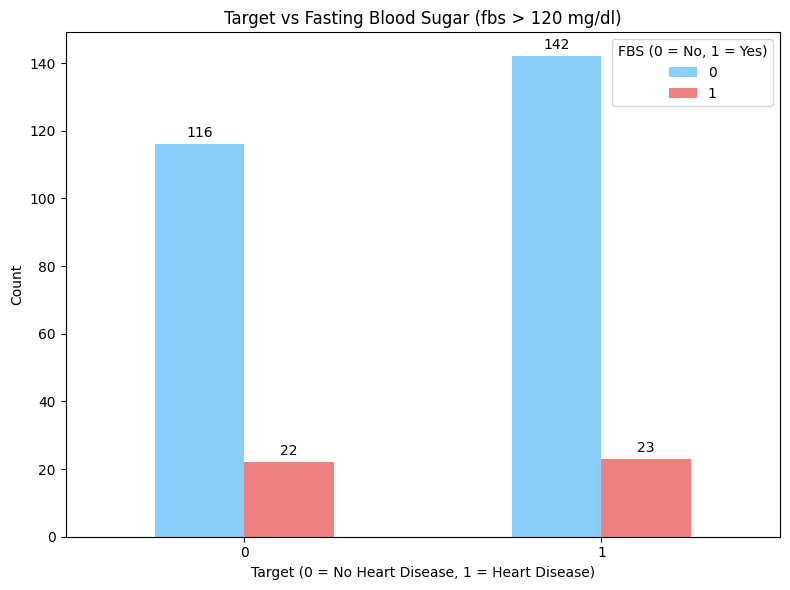

In [18]:
# Crosstab: Target vs Fasting Blood Sugar
crosstab_2 = pd.crosstab(index=df['target'], columns=df['fbs'])

# Plot
ax = crosstab_2.plot(kind='bar', figsize=(8,6), color=['lightskyblue', 'lightcoral'])

# Labels and title
plt.title('Target vs Fasting Blood Sugar (fbs > 120 mg/dl)')
plt.xlabel('Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='FBS (0 = No, 1 = Yes)')

# Annotate count values on bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # vertical offset
                        textcoords='offset points',
                        ha='center', va='bottom')

plt.tight_layout()
plt.show()


The maximum number of people without high blood sugar who had heart disease is 142, while 23 people with high blood sugar also had heart disease.

#### Compare restecg with target Column

<Figure size 800x600 with 0 Axes>

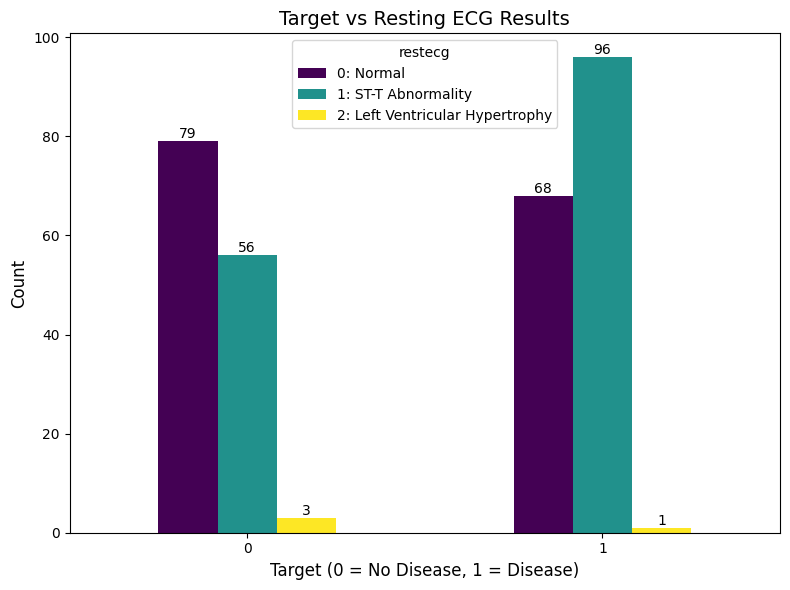

In [19]:
# Crosstab: restecg vs Target
crosstab_3 = pd.crosstab(index=df['target'], columns=df['restecg'])

# Plot
plt.figure(figsize=(8, 6))
crosstab_3.plot(kind='bar', figsize=(8, 6), colormap='viridis')

# Titles and labels
plt.title('Target vs Resting ECG Results', fontsize=14)
plt.xlabel('Target (0 = No Disease, 1 = Disease)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='restecg', labels=[
    '0: Normal',
    '1: ST-T Abnormality',
    "2: Left Ventricular Hypertrophy"
])

# Annotate bars
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


The people has normal and abnormal ecg having maximum rate of heart disease, so restecg cannot make directly impact on heart disease

#### Compare Exercise induced angina with target Column

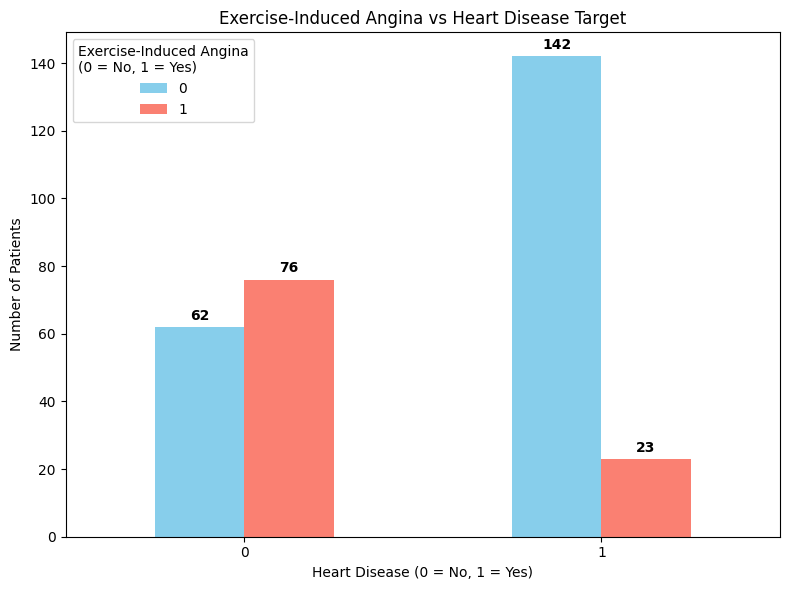

In [20]:
# Exang: exercise induced angina (1 = yes; 0 = no)
# 0 → No angina during exercise
# 1 → Angina (chest pain) occurs during exercise

# Crosstab: Exercise Agina vs Target
crosstab_4 = pd.crosstab(index=df['target'], columns=df['exang'])

# Plot
ax = crosstab_4.plot(kind='bar', figsize=(8,6), color=['skyblue', 'salmon'])

# Titles and labels
plt.title('Exercise-Induced Angina vs Heart Disease Target')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.legend(title='Exercise-Induced Angina\n(0 = No, 1 = Yes)')
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations on top of bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text slightly above bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


#### Compare Slope with Target Column


The ST segment is a part of an ECG (electrocardiogram) that represents the period between ventricular depolarization and repolarization.
Changes in its slope during exercise can indicate heart conditions, especially ischemia (reduced blood flow to the heart)

- slope: the slope of the peak exercise ST segment
- Value 0: upsloping
- Value 1: flat
- Value 2: downsloping


<Figure size 800x600 with 0 Axes>

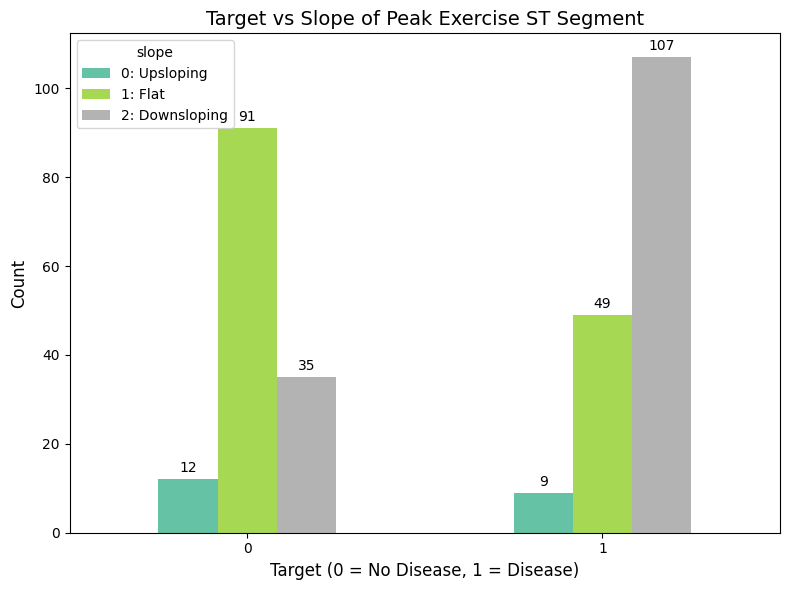

In [21]:
# Crosstab: slope vs target
crosstab_5 = pd.crosstab(index=df['target'], columns=df['slope'])

# Create plot
plt.figure(figsize=(8, 6))
crosstab_5.plot(kind='bar', figsize=(8, 6), colormap='Set2')

# Titles and labels
plt.title('Target vs Slope of Peak Exercise ST Segment', fontsize=14)
plt.xlabel('Target (0 = No Disease, 1 = Disease)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='slope', labels=[
    '0: Upsloping',
    '1: Flat',
    '2: Downsloping'
])

# Annotate bars
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{int(height)}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='bottom', fontsize=10, color='black',
                           xytext=(0, 3), textcoords='offset points')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


People with a downsloping ST segment have a higher rate of heart disease.

### Insights from the above Analysis

- Maximum People having 40+ Age.
  
- The Dataset Contains 207 Males and 96 Females.

- Out of 303 Dataset, 93 Males and 72 Females Found Heart Disease, whereas 114 Males and 24 Females not found Heart Disease.

- out of 303 Dataset, 33 Males and 12 Females having sugar level more than 120 mg/dl, where as 174 Males and 84 Females having sugar level     less than 120 mg/dl.

- Maximum i.e. 143 Patients having typical angina, 50 Patients with atypical angina, 87: Patients with non-anginal pain and 23 Patients        asymptomatic

- Maximum Heart Rate is found between age group of 35 to 55.

- The Dataset Shows 165 as Heart Disease and Non Heart Disease Patients are 138.

- 75% Females and 44.92% Males found Heart Disease - Average : 59.96% Heart Disease Patients.

# MODEL BUILDING

In [22]:
# Split data into feature and target
X = df.drop(columns=['target'],axis=1)
y = df.target

In [23]:
# Split data into train test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [24]:
# Numerical columns to scale
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

In [25]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector": SVC(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


In [26]:
results = []

for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocess', ColumnTransformer([
            ('scale', StandardScaler(), numeric_features)
        ], remainder='passthrough')),
        ('classifier', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Evaluate
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })


In [27]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='F1 Score', ascending=False, inplace=True)
print(results_df)


                 Model  Accuracy  Precision  Recall  F1 Score
3       Support Vector  0.868132   0.865385    0.90  0.882353
0  Logistic Regression  0.868132   0.880000    0.88  0.880000
5  K-Nearest Neighbors  0.835165   0.843137    0.86  0.851485
4          Naive Bayes  0.813187   0.823529    0.84  0.831683
2        Random Forest  0.813187   0.851064    0.80  0.824742
1        Decision Tree  0.780220   0.800000    0.80  0.800000
6              XGBoost  0.747253   0.800000    0.72  0.757895


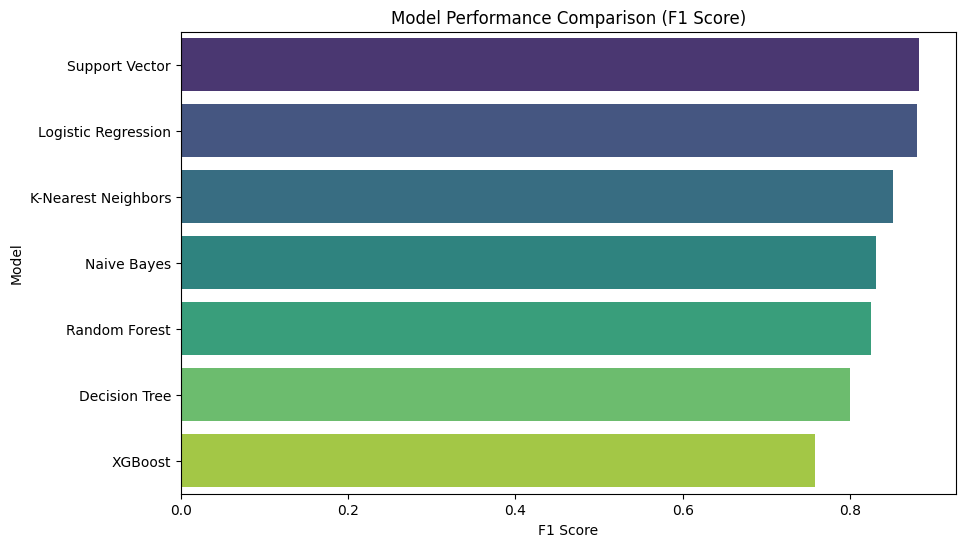

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='F1 Score', y='Model', data=results_df, palette='viridis')
plt.title('Model Performance Comparison (F1 Score)')
plt.show()


#### EVALUATING MODEL USING CROSS-VALIDATION

In [29]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer

In [30]:
def evaluate_model_cv(model, X, y, numeric_features):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

    # Pipeline with scaling
    pipeline = Pipeline(steps=[
        ('preprocess', ColumnTransformer([
            ('scale', StandardScaler(), numeric_features)
        ], remainder='passthrough')),
        ('classifier', model)
    ])

    scores = {
        "Accuracy": cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy'),
        "Precision": cross_val_score(pipeline, X, y, cv=cv, scoring='precision'),
        "Recall": cross_val_score(pipeline, X, y, cv=cv, scoring='recall'),
        "F1 Score": cross_val_score(pipeline, X, y, cv=cv, scoring='f1')
    }

    return {metric: (np.mean(val), np.std(val)) for metric, val in scores.items()}


In [31]:
results = []

# You must define X, y and numeric_features first!
# X = your feature dataframe
# y = your target column (df['target'])
# numeric_features = list of numeric column names (for scaling)

for name, model in models.items():
    scores = evaluate_model_cv(model, X, y, numeric_features)
    results.append({
        "Model": name,
        "Accuracy": f"{scores['Accuracy'][0]:.4f} ± {scores['Accuracy'][1]:.4f}",
        "Precision": f"{scores['Precision'][0]:.4f} ± {scores['Precision'][1]:.4f}",
        "Recall": f"{scores['Recall'][0]:.4f} ± {scores['Recall'][1]:.4f}",
        "F1 Score": f"{scores['F1 Score'][0]:.4f} ± {scores['F1 Score'][1]:.4f}"
    })

df_results = pd.DataFrame(results)
print(df_results)


                 Model         Accuracy        Precision           Recall  \
0  Logistic Regression  0.8415 ± 0.0172  0.8240 ± 0.0193  0.9030 ± 0.0402   
1        Decision Tree  0.7491 ± 0.0486  0.7660 ± 0.0331  0.7636 ± 0.1172   
2        Random Forest  0.8217 ± 0.0336  0.8310 ± 0.0257  0.8364 ± 0.0781   
3       Support Vector  0.8251 ± 0.0167  0.7932 ± 0.0248  0.9212 ± 0.0411   
4          Naive Bayes  0.8151 ± 0.0289  0.8195 ± 0.0437  0.8545 ± 0.0727   
5  K-Nearest Neighbors  0.7921 ± 0.0266  0.7806 ± 0.0254  0.8606 ± 0.0242   
6              XGBoost  0.8217 ± 0.0358  0.8143 ± 0.0296  0.8727 ± 0.0588   

          F1 Score  
0  0.8610 ± 0.0168  
1  0.7848 ± 0.0547  
2  0.8437 ± 0.0254  
3  0.8514 ± 0.0141  
4  0.8333 ± 0.0294  
5  0.8185 ± 0.0224  
6  0.8414 ± 0.0351  


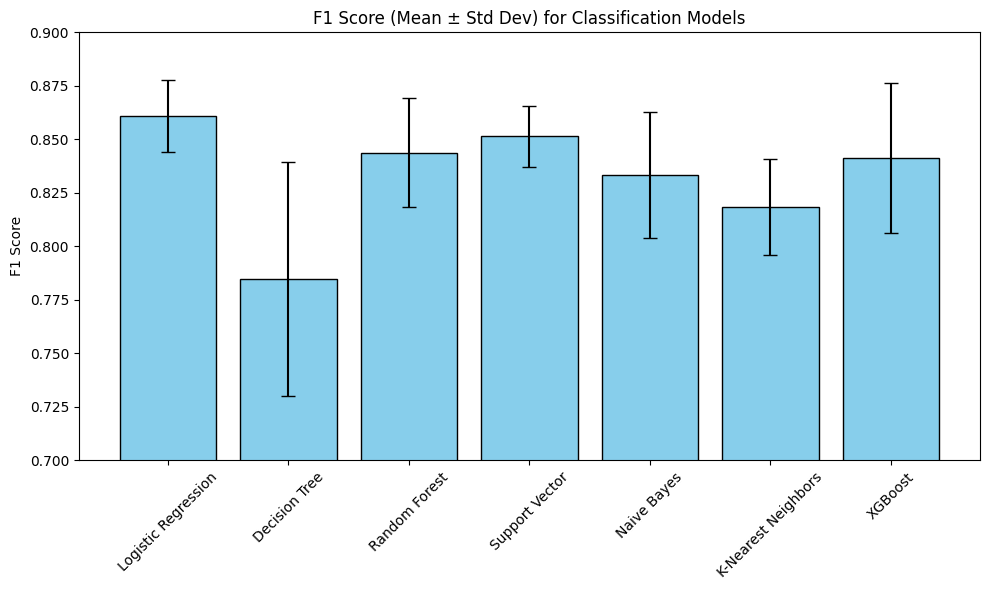

In [32]:
import matplotlib.pyplot as plt

# Extract model names and F1 scores
models = df_results['Model']
f1_scores = df_results['F1 Score'].str.extract(r'([\d.]+) ± ([\d.]+)').astype(float)
means = f1_scores[0]
stds = f1_scores[1]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, means, yerr=stds, capsize=5, color='skyblue', edgecolor='black')
plt.xticks(rotation=45)
plt.title('F1 Score (Mean ± Std Dev) for Classification Models')
plt.ylabel('F1 Score')
plt.ylim(0.7, 0.9)
plt.tight_layout()
plt.show()


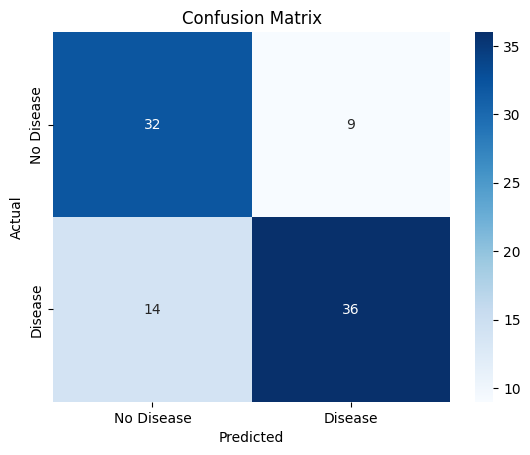

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#### TRAINING MODEL ON FULL DATA FOR DEPLOYEMENT

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.utils import shuffle
import joblib

# Load dataset
df = pd.read_csv("/Users/adityaanandraogaikwad/Desktop/DATA SETS/heart-disease.csv")

# Separate features and target
X = df.drop(columns=["target"])
y = df["target"]
X, y = shuffle(X, y, random_state=42)

# Feature sets
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Logistic Regression
base_model = LogisticRegression(class_weight='balanced', max_iter=1000, C=1.0)

# Calibrated Classifier with 5-fold CV
calibrated_model = CalibratedClassifierCV(base_model, cv=StratifiedKFold(n_splits=5))

# Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', calibrated_model)
])

# Fit and save
pipeline.fit(X, y)
joblib.dump(pipeline, "heart_disease_model.pkl")
print("✅ Calibrated model saved as 'heart_disease_model.pkl'")
